In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline

In [6]:
(x_train,y_train), (X_test,y_test)= keras.datasets.mnist.load_data()


11501568/11490434 [==============================] - 4s 0us/step


In [7]:
len(x_train)

60000

In [8]:
len(X_test)

10000

In [10]:
x_train[0].shape

(28, 28)

In [11]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

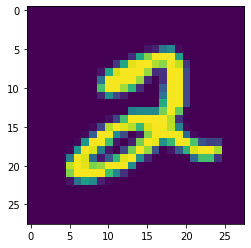

In [13]:
plt.imshow(x_train[5])

### Reshaping the shape

In [17]:
x_train.shape

(60000, 28, 28)

In [30]:
# Now we are scaling the value because the accuracy is not very good
x_train = x_train/255
X_test = X_test/255

In [31]:
x_train_flattened = x_train.reshape(60000,28*28)
X_test_flattened = X_test.reshape(10000,28*28)

In [32]:
print(x_train_flattened.shape, X_test_flattened.shape)

(60000, 784) (10000, 784)


### Training

In [29]:
model = keras.Sequential([
    keras.Input(shape=(784,)),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train_flattened, y_train,epochs=5)
# here the accuracy is not very good the one reason may be is values are not scaled
# So lets go to up and scale the value between 0 to 1 of x_train and x_test

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 9.5480 - accuracy: 0.8435
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 6.1712 - accuracy: 0.8785
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.7575 - accuracy: 0.8830
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.6231 - accuracy: 0.8858
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.2419 - accuracy: 0.8877


# Doing same training as above with the scaled data

In [33]:
model = keras.Sequential([
    keras.Input(shape=(784,)),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train_flattened, y_train,epochs=5)
# Now we have accuracy as 92%

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4743 - accuracy: 0.8753
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3044 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2839 - accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2734 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2666 - accuracy: 0.9262


In [34]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2683 - accuracy: 0.9266


[0.26825717091560364, 0.9265999794006348]

# Testing the datas

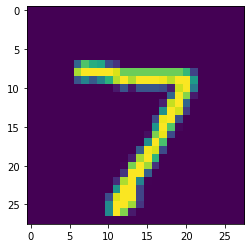

In [36]:
plt.imshow(X_test[0])

In [40]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([2.55506933e-02, 5.33556033e-07, 1.07603461e-01, 9.70696688e-01,
       3.58876586e-03, 1.58184707e-01, 1.36006202e-06, 9.99784589e-01,
       1.02728814e-01, 6.73822105e-01], dtype=float32)

### Right Prediction

In [43]:
np.argmax(y_predicted[0])

7

## Confusion matrix 

In [46]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [47]:
cm = tf.math.confusion_matrix(labels=y_test,predictions= y_predicted_labels)
print(cm)

tf.Tensor(
[[ 966    0    2    2    0    4    3    2    1    0]
 [   0 1116    4    1    0    1    4    2    7    0]
 [   7    9  921   17    7    5   11   10   41    4]
 [   4    0   21  912    0   30    2   12   23    6]
 [   2    1    4    2  918    0    9    4   10   32]
 [   9    3    2   23    6  795   12    3   34    5]
 [  15    3    6    1    7   16  906    2    2    0]
 [   1    7   24    6    8    1    0  951    2   28]
 [   8    9    6   19    9   24    9   13  868    9]
 [  11    7    1    9   30    9    0   24    5  913]], shape=(10, 10), dtype=int32)


Text(69.0, 0.5, 'Truth')

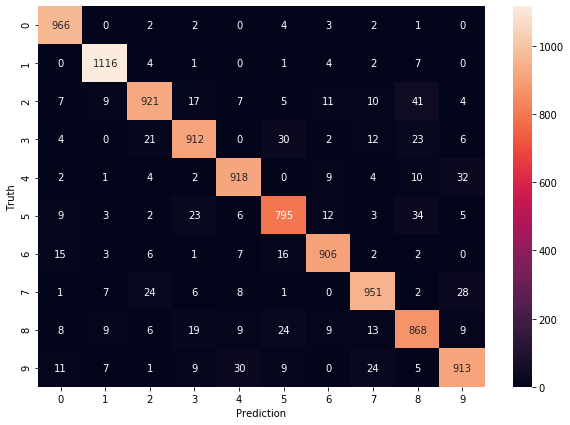

In [48]:
import seaborn as sns

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')
'''
Here cm[1][1] = 1116 means that 1116 time 1 is predicted as 1 

As we can see there are much numbers are predicted wrongly 
so we need to fix these error by adding some more hidden layers
in the model training 
'''

In [50]:
model = keras.Sequential([
    keras.Input(shape=(784,)), # the input neuron = 784
    keras.layers.Dense(100, activation='relu'), # the output neuron should be less than input neuron 
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train_flattened, y_train,epochs=5)
# now accuracy is increasd from 92 to 98% by adding one more layers

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2798 - accuracy: 0.9211
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1250 - accuracy: 0.9633
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0859 - accuracy: 0.9741
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0651 - accuracy: 0.9802
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0507 - accuracy: 0.9844


In [51]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0750 - accuracy: 0.9780


[0.07497704774141312, 0.9779999852180481]

Text(69.0, 0.5, 'Truth')

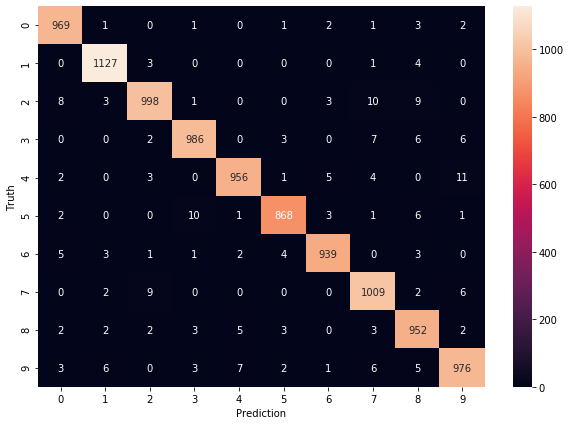

In [52]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions= y_predicted_labels)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')


## Keras has built in tool to flatten the matrixes 

In [55]:
model = keras.Sequential([
#     keras.Input(shape=(784,)), # the input neuron = 784
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'), # the output neuron should be less than input neuron 
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train, y_train,epochs=5)
# now accuracy is increasd from 92 to 98% by adding one more layers

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2646 - accuracy: 0.9246
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1153 - accuracy: 0.9669
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0819 - accuracy: 0.9755
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0621 - accuracy: 0.9805
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0497 - accuracy: 0.9844


### Now we can play with different parameter i.e.  change the activation function, number of epochs, adding more layer, using different optimizer

#### Some points:
1. Use sigmoid in output layer. All other places try to use tanh (in general)
2. For hidden layers if you are not sure which activation function to use just use 'ReLU' as your default choice{ReLU = max(0,x)}
3. Leaky ReLU = max(0.1x, x)
4. But you need to try and error

# Complete Code

In [57]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline
(x_train,y_train), (X_test,y_test)= keras.datasets.mnist.load_data()
# Now we are scaling the value because the accuracy is not very good
x_train = x_train/255
X_test = X_test/255
x_train_flattened = x_train.reshape(60000,28*28)
X_test_flattened = X_test.reshape(10000,28*28)

model = keras.Sequential([
#     keras.Input(shape=(784,)), # the input neuron = 784
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'), # the output neuron should be less than input neuron 
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train, y_train,epochs=5)


Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2742 - accuracy: 0.9222
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1247 - accuracy: 0.9639
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0878 - accuracy: 0.9735
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0669 - accuracy: 0.9797
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0516 - accuracy: 0.9839


313/313 [==============================] - 2s 6ms/step - loss: 0.0776 - accuracy: 0.9759


Text(69.0, 0.5, 'Truth')

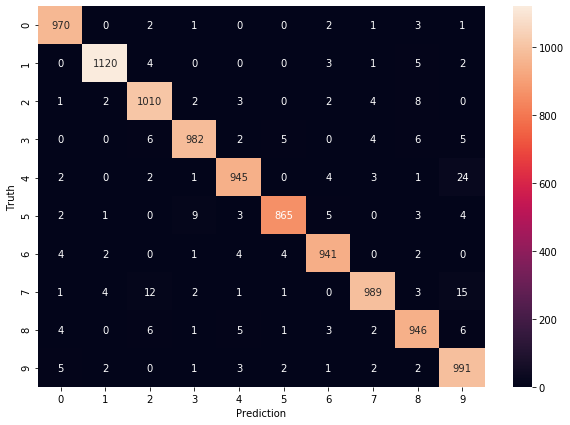

In [67]:
model.evaluate(X_test, y_test)
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions= y_predicted_labels)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')